In [1]:
import pandas as pd

# Load the review embeddings CSV file into a DataFrame
embedded_df = pd.read_csv('embedded_review.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
embedded_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,758,759,760,761,762,763,764,765,766,767
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,-0.416409,-0.364040,-0.036060,0.383963,0.176255,-0.147201,-0.243359,-0.541467,0.062160,0.049585
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,-0.279307,-0.419729,-0.389261,0.328398,0.291834,-0.027217,-0.359790,-0.706709,0.047264,-0.017902
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,-0.232733,-0.031823,-0.032784,0.188440,0.162272,0.363399,-0.096650,-0.693634,-0.024901,0.548486
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,-0.310564,-0.599643,-0.375174,0.309915,0.577983,0.051811,-0.184821,-0.710691,0.065533,0.371945
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,-0.247983,-0.438636,-0.037911,-0.030183,0.508780,0.064493,-0.205261,-0.527391,-0.101341,0.039573


In [2]:
# Read the review_sentiment CSV
sentiment_df = pd.read_csv('reviews_sentiments.csv')

# Display the first few rows of the DataFrame to verify it was loaded correctly
sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,POSITIVE
1,92703,I used to take another oral contraceptive whic...,NEGATIVE
2,138000,This is my first time using any form of birth ...,NEGATIVE
3,35696,Suboxone has completely turned my life around ...,POSITIVE
4,155963,2nd day on 5mg started to work with rock hard ...,NEGATIVE


In [3]:
!pip install wordcloud

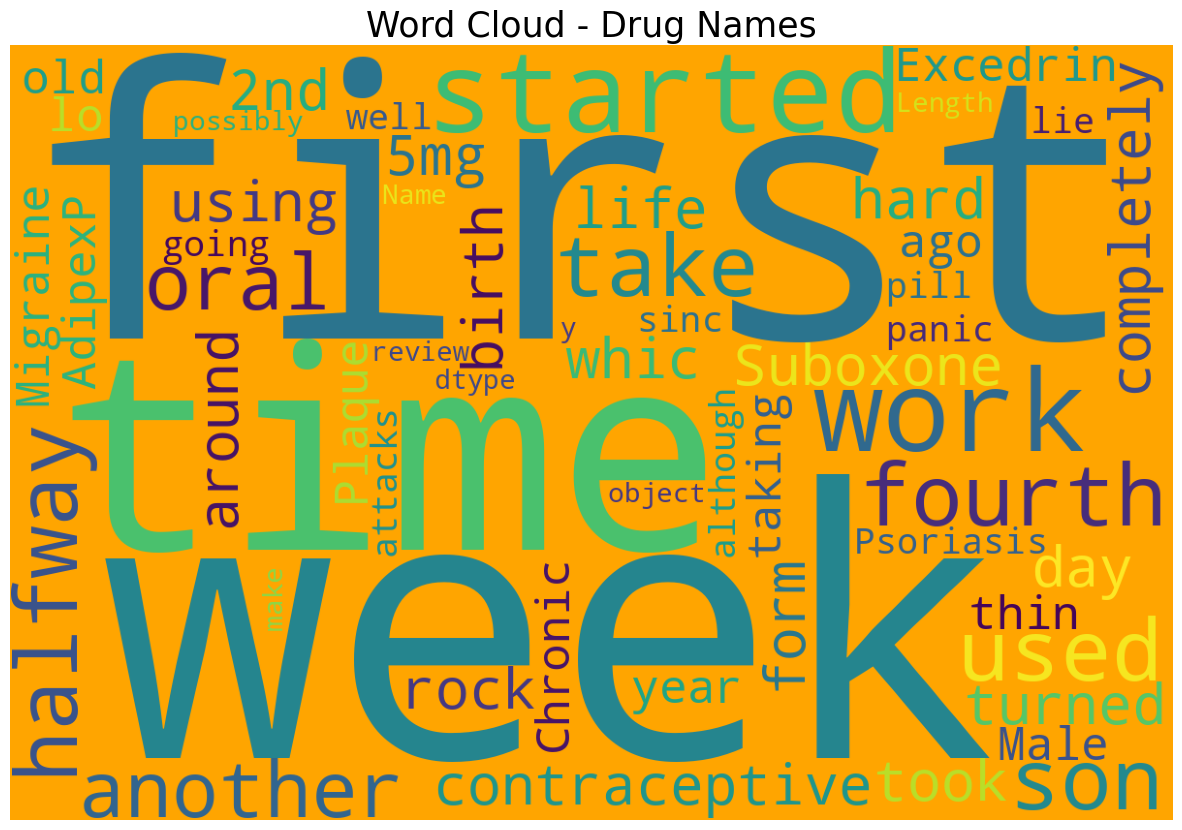

In [5]:
# Import all the required dependencies
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# stopwords
stopwords = set(STOPWORDS)
# Build the word cloud
wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(sentiment_df['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
#  Plot the word cloud
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [6]:
# Replace the sentiment labels 'POSITIVE', 'NEGATIVE', 'NEUTRAL' with 0,1 and 2 respectively

sentiment_df['sentiment'].replace('NEGATIVE', 0, inplace =True)

sentiment_df['sentiment'].replace('POSITIVE', 1, inplace =True)

sentiment_df['sentiment'].replace('NEUTRAL', 2, inplace =True)

# Display the first few rows of the DataFrame
sentiment_df.head()

,uniqueID,review,sentiment
0,95260,My son is halfway through his fourth week of I...,1
1,92703,I used to take another oral contraceptive whic...,0
2,138000,This is my first time using any form of birth ...,0
3,35696,Suboxone has completely turned my life around ...,1
4,155963,2nd day on 5mg started to work with rock hard ...,0


In [7]:
# Records for each sentiments.Postive and negative labels are almost balanced, but very few records with neutral label.
sentiment_df['sentiment'].value_counts()

1    6294
0    4953
2      68
Name: sentiment, dtype: int64

In [9]:
# drop the rows with neutral sentiments to balance the data
sentiment_df = sentiment_df[sentiment_df['sentiment'] != 2]
sentiment_df['sentiment'].value_counts()

1    6294
0    4953
Name: sentiment, dtype: int64

In [10]:
# drop the review column from sentiment_df
sentiment_df.drop('review', axis=1, inplace=True)

In [11]:
# Display the first few rows of the DataFrame
sentiment_df.head()

,uniqueID,sentiment
0,95260,1
1,92703,0
2,138000,0
3,35696,1
4,155963,0


In [12]:
# Merge embedded_df and sentiment_df dataframes
embedded_sentiment_df = pd.merge(embedded_df, sentiment_df, on='uniqueID')

# Display the first few rows of the DataFrame
embedded_sentiment_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,lengthReview,conditionCluster_label,drugNameCluster_label,...,759,760,761,762,763,764,765,766,767,sentiment
0,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8.0,27-Apr-10,192.0,712.0,2.0,4.0,...,-0.364040,-0.036060,0.383963,0.176255,-0.147201,-0.243359,-0.541467,0.062160,0.049585,1
1,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5.0,14-Dec-09,17.0,708.0,9.0,6.0,...,-0.419729,-0.389261,0.328398,0.291834,-0.027217,-0.359790,-0.706709,0.047264,-0.017902,0
2,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8.0,3-Nov-15,10.0,428.0,9.0,4.0,...,-0.031823,-0.032784,0.188440,0.162272,0.363399,-0.096650,-0.693634,-0.024901,0.548486,0
3,35696,Buprenorphine naloxone,Opiate Dependence,Suboxone has completely turned my life around ...,9.0,27-Nov-16,37.0,669.0,0.0,2.0,...,-0.599643,-0.375174,0.309915,0.577983,0.051811,-0.184821,-0.710691,0.065533,0.371945,1
4,155963,Cialis,Benign Prostatic Hyperplasia,2nd day on 5mg started to work with rock hard ...,2.0,28-Nov-15,43.0,373.0,0.0,5.0,...,-0.438636,-0.037911,-0.030183,0.508780,0.064493,-0.205261,-0.527391,-0.101341,0.039573,0


In [13]:
# Total number of records in the dataframe
len(embedded_sentiment_df)

11247

In [38]:
# The NNet model classifies the sentiment as Postive, Negative and Neutral based on the review embeddings
# For now we are considering all the components

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [15]:
embedded_sentiment_df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label',
       ...
       '759', '760', '761', '762', '763', '764', '765', '766', '767',
       'sentiment'],
      dtype='object', length=779)

In [16]:
# Drop all the columns that are not embeddings of the review and the sentiment labels.

columns_to_drop = ['uniqueID', 'drugName', 'condition', 'review', 'date', 'lengthReview', 'conditionCluster_label',
       'drugNameCluster_label']

embedded_sentiment770_df = embedded_sentiment_df.drop(columns=columns_to_drop)
embedded_sentiment770_df.head(5)

,rating,usefulCount,0,1,2,3,4,5,6,7,...,759,760,761,762,763,764,765,766,767,sentiment
0,8.0,192.0,-0.010977,0.010914,0.200967,-0.229490,-0.535286,0.012419,0.578620,0.578304,...,-0.364040,-0.036060,0.383963,0.176255,-0.147201,-0.243359,-0.541467,0.062160,0.049585,1
1,5.0,17.0,0.066320,0.189584,0.369006,-0.046920,-0.473988,-0.238288,0.341089,0.252703,...,-0.419729,-0.389261,0.328398,0.291834,-0.027217,-0.359790,-0.706709,0.047264,-0.017902,0
2,8.0,10.0,0.084101,-0.019134,0.294494,0.029783,-0.228783,0.170102,0.185404,0.210424,...,-0.031823,-0.032784,0.188440,0.162272,0.363399,-0.096650,-0.693634,-0.024901,0.548486,0
3,9.0,37.0,0.007820,0.207558,0.179105,-0.210057,-0.197015,0.104799,0.338058,0.038666,...,-0.599643,-0.375174,0.309915,0.577983,0.051811,-0.184821,-0.710691,0.065533,0.371945,1
4,2.0,43.0,-0.193177,0.360585,0.448292,-0.253824,-0.532782,0.085381,0.607802,0.260307,...,-0.438636,-0.037911,-0.030183,0.508780,0.064493,-0.205261,-0.527391,-0.101341,0.039573,0


features - review embeddings, usefulCount, rating

In [39]:
# Split preprocessed data into features and target arrays

from keras.utils import to_categorical

# Separate the target variable
target = embedded_sentiment770_df['sentiment']

# Verify the unique values in the target variable
print(target.unique())

# Extract features (excluding the target variable)
features = embedded_sentiment770_df.drop(columns=['sentiment'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30)

# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)

# Check the shapes of the one-hot encoded target labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

[1 0]
Shape of y_train_encoded: (7872, 2)
Shape of y_test_encoded: (3375, 2)


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Check the number of dimensions, make it a variable so it passes into

num_dimensions = embedded_sentiment770_df.shape[1]-1
print(num_dimensions)

770


In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 2 classifications to predict now


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=770, activation="sigmoid", input_dim=num_dimensions))

# Second hidden layer
nn.add(Dense(units=600, activation='relu'))

# Third hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=300, activation='leaky_relu'))

#Fourth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=150, activation='relu'))

#Fifth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=100, activation='leaky_relu'))

#Sixth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=50, activation='relu'))

#Seventh hidden layer (example of adding another hidden layer)
nn.add(Dense(units=25, activation='leaky_relu'))

#Eighth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=15, activation='relu'))

# Output layer
nn.add(Dense(units=2, activation='softmax'))  # 3 units for 3 classes, softmax activation

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 770)               593670    
                                                                 
 dense_37 (Dense)            (None, 600)               462600    
                                                                 
 dense_38 (Dense)            (None, 300)               180300    
                                                                 
 dense_39 (Dense)            (None, 150)               45150     
                                                                 
 dense_40 (Dense)            (None, 100)               15100     
                                                                 
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 25)               

In [43]:
# Compile the model - the loss function is categorical and not for binary classification

# Define optimizer with custom learning rate
from tensorflow.keras.optimizers import Adam


custom_optimizer = Adam(learning_rate=0.001)

nn.compile(loss="categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

In [44]:
 # Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=10)

Epoch 1/10
246/246 [==============================] - 8s 24ms/step - loss: 0.6077 - accuracy: 0.6692
Epoch 2/10
246/246 [==============================] - 4s 18ms/step - loss: 0.4711 - accuracy: 0.7771
Epoch 3/10
246/246 [==============================] - 5s 19ms/step - loss: 0.4083 - accuracy: 0.8167
Epoch 4/10
246/246 [==============================] - 6s 23ms/step - loss: 0.3804 - accuracy: 0.8331
Epoch 5/10
246/246 [==============================] - 4s 18ms/step - loss: 0.3466 - accuracy: 0.8510
Epoch 6/10
246/246 [==============================] - 5s 21ms/step - loss: 0.3152 - accuracy: 0.8627
Epoch 7/10
246/246 [==============================] - 5s 21ms/step - loss: 0.2758 - accuracy: 0.8833
Epoch 8/10
246/246 [==============================] - 4s 18ms/step - loss: 0.2192 - accuracy: 0.9103
Epoch 9/10
246/246 [==============================] - 6s 23ms/step - loss: 0.1787 - accuracy: 0.9281
Epoch 10/10
246/246 [==============================] - 5s 19ms/step - loss: 0.1052 - accura

In [45]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 1s 9ms/step - loss: 0.8623 - accuracy: 0.7973
Test Loss: 0.8623246550559998
Test Accuracy: 0.7973333597183228


In [ ]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the model - deep neural net with L2 regularization
nn = Sequential()

# First hidden layer with L2 regularization
nn.add(Dense(units=770, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_dim=num_dimensions))

# Second hidden layer with L2 regularization
nn.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Third hidden layer with L2 regularization
nn.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Fourth hidden layer with L2 regularization
nn.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Fifth hidden layer with L2 regularization
nn.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Sixth hidden layer with L2 regularization
nn.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Seventh hidden layer with L2 regularization
nn.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Eighth hidden layer with L2 regularization
nn.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Output layer
nn.add(Dense(units=2, activation='softmax'))

# Define optimizer with custom learning rate
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
nn.compile(loss="categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=200)

Epoch 1/200
246/246 [==============================] - 13s 31ms/step - loss: 3.7748 - accuracy: 0.6451
Epoch 2/200
246/246 [==============================] - 8s 34ms/step - loss: 0.7084 - accuracy: 0.7447
Epoch 3/200
246/246 [==============================] - 4s 18ms/step - loss: 0.6403 - accuracy: 0.7872
Epoch 4/200
246/246 [==============================] - 6s 23ms/step - loss: 0.5932 - accuracy: 0.7990
Epoch 5/200
246/246 [==============================] - 5s 18ms/step - loss: 0.5567 - accuracy: 0.8168
Epoch 6/200
246/246 [==============================] - 4s 18ms/step - loss: 0.5403 - accuracy: 0.8232
Epoch 7/200
246/246 [==============================] - 6s 23ms/step - loss: 0.5252 - accuracy: 0.8286
Epoch 8/200
246/246 [==============================] - 4s 18ms/step - loss: 0.5171 - accuracy: 0.8327
Epoch 9/200
246/246 [==============================] - 5s 18ms/step - loss: 0.5023 - accuracy: 0.8431
Epoch 10/200
246/246 [==============================] - 6s 23ms/step - loss: 0.49

In [ ]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 1s 5ms/step - loss: 0.8766 - accuracy: 0.7754
Test Loss: 0.876634418964386
Test Accuracy: 0.7754074335098267


In [ ]:
X_train_scaled.shape

(7872, 770)

In [ ]:
y_train_encoded.shape

(7872, 2)

In [46]:
import numpy as np
#Get the test results from the above Neural Net

# Get predicted probabilities for each class
y_pred_probabilities = nn.predict(X_test_scaled)

# Convert probabilities to predicted classes by selecting the class with the highest probability
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test_encoded back to categorical labels
y_test_categorical = np.argmax(y_test_encoded, axis=1)

# Create a DataFrame to compare predicted and actual classes
result_df = pd.DataFrame({'Actual': y_test_categorical, 'Predicted': y_pred})

# Add a column indicating whether the prediction was correct
result_df['Correct'] = result_df['Actual'] == result_df['Predicted']

# Display the DataFrame
print(result_df)

# Calculate accuracy manually
accuracy = result_df['Correct'].mean()
print("Manual Test Accuracy:", accuracy)

106/106 [==============================] - 1s 6ms/step
      Actual  Predicted  Correct
0          0          0     True
1          1          1     True
2          1          1     True
3          0          0     True
4          0          0     True
...      ...        ...      ...
3370       1          1     True
3371       1          1     True
3372       1          1     True
3373       0          1    False
3374       0          0     True

[3375 rows x 3 columns]
Manual Test Accuracy: 0.7973333333333333


In [48]:
from google.colab import files
# Export result_df to a CSV file
result_df.to_csv('prediction_results.csv', index=False)
# Download the CSV file
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00


In [51]:
#  Hyperparameter tuning

# Import all the dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=64, max_value=800, step=64), activation='relu', input_dim=num_dimensions))
    for i in range(hp.Int('num_layers', 1, 8)):  # Number of hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=64, max_value=512, step=64), activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train_scaled, y_train_encoded, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of units in the input layer: {best_hps.get('units_input')}")
print(f"Optimal learning rate for the optimizer: {best_hps.get('learning_rate')}")
print(f"Optimal number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Optimal number of units in layer {i}: {best_hps.get('units_' + str(i))}")

# Build the model with the best hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print("Test accuracy:", accuracy)

Trial 20 Complete [00h 00m 47s]
val_accuracy: 0.7860317428906759

Best val_accuracy So Far: 0.8084656198819479
Total elapsed time: 00h 19m 11s
Optimal number of units in the input layer: 64
Optimal learning rate for the optimizer: 0.001
Optimal number of hidden layers: 8
Optimal number of units in layer 0: 128
Optimal number of units in layer 1: 448
Optimal number of units in layer 2: 448
Optimal number of units in layer 3: 64
Optimal number of units in layer 4: 64
Optimal number of units in layer 5: 64
Optimal number of units in layer 6: 64
Optimal number of units in layer 7: 64
Epoch 1/50
197/197 [==============================] - 4s 11ms/step - loss: 0.6180 - accuracy: 0.6517 - val_loss: 0.5725 - val_accuracy: 0.7041
Epoch 2/50
197/197 [==============================] - 2s 9ms/step - loss: 0.4768 - accuracy: 0.7810 - val_loss: 0.4713 - val_accuracy: 0.7625
Epoch 3/50
197/197 [==============================] - 2s 10ms/step - loss: 0.3704 - accuracy: 0.8363 - val_loss: 0.4513 - val_ac

In [60]:
# Redefine the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 2 classifications to predict now


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=64, activation="sigmoid", input_dim=num_dimensions))

# First hidden layer
nn.add(Dense(units=128, activation='relu'))

# Second hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=448, activation='leaky_relu'))

# Third hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=448, activation='relu'))

#Fourth hidden layer (example of adding another hidden layer)
nn.add(Dense(units=64, activation='leaky_relu'))

# Fifth hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=64, activation='relu'))

# Sixth hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=64, activation='leaky_relu'))

# Seventh hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=64, activation='relu'))

# Eighth hidden layer (example of adding an additional hidden layer)
nn.add(Dense(units=64, activation='relu'))

# Output layer
nn.add(Dense(units=2, activation='softmax'))  # 2 units for 3 classes, softmax activation

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                49344     
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 448)               57792     
                                                                 
 dense_37 (Dense)            (None, 448)               201152    
                                                                 
 dense_38 (Dense)            (None, 64)                28736     
                                                                 
 dense_39 (Dense)            (None, 64)                4160      
                                                                 
 dense_40 (Dense)            (None, 64)               

In [61]:
# Compile the model - the loss function is categorical and not for binary classification

# Define optimizer with custom learning rate
custom_optimizer = Adam(learning_rate=0.001)

nn.compile(loss="categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

In [62]:
 # Fit the model to the training data
fit_model = nn.fit(X_train_scaled, y_train_encoded, epochs=10)

Epoch 1/10
246/246 [==============================] - 4s 8ms/step - loss: 0.5914 - accuracy: 0.6791
Epoch 2/10
246/246 [==============================] - 2s 8ms/step - loss: 0.4475 - accuracy: 0.7965
Epoch 3/10
246/246 [==============================] - 2s 8ms/step - loss: 0.3883 - accuracy: 0.8232
Epoch 4/10
246/246 [==============================] - 2s 9ms/step - loss: 0.3542 - accuracy: 0.8465
Epoch 5/10
246/246 [==============================] - 4s 15ms/step - loss: 0.3243 - accuracy: 0.8610
Epoch 6/10
246/246 [==============================] - 2s 8ms/step - loss: 0.2829 - accuracy: 0.8788
Epoch 7/10
246/246 [==============================] - 2s 8ms/step - loss: 0.2408 - accuracy: 0.8994
Epoch 8/10
246/246 [==============================] - 2s 8ms/step - loss: 0.1926 - accuracy: 0.9215
Epoch 9/10
246/246 [==============================] - 3s 10ms/step - loss: 0.1584 - accuracy: 0.9350
Epoch 10/10
246/246 [==============================] - 3s 11ms/step - loss: 0.1230 - accuracy: 0.9

In [63]:
test_loss, test_accuracy = nn.evaluate(X_test_scaled, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 1s 4ms/step - loss: 0.7266 - accuracy: 0.7991
Test Loss: 0.7265671491622925
Test Accuracy: 0.7991111278533936
